# P03 Ejemplos Porceso

Pensamiento Computacional, Diseño UC

Ricardo vega, Francisco Rebolledo



Para el proyecto P03 se consideran algunas de estas etapas, de las cuales se brindan ejemplos a continuación. 

**A- RECOLECCIÓN Y ESTRUCTURACIÓN:**  
Considera scrapping desde sitios de noticias, o a veces recoplección desde bases de datos.  

**B- INSPECCIÓN Y LIMPIEZA:**  
Luego de ver las principales características de los datos de texto, se deja solo la información necesaria. De esta manera se dejan los datos en el formato adecuado para trabajar. 

**C- ANÁLISIS Y VISUALIZACIÓN:**  
Una vez en formato adecuado, se analiza el texto usando de estrategias de visualización. Algunas técnicas posibles de usar son: 
- Dispersión léxica: en qué parte del texto se encuentan ciertas palabras.
- Frecuencia de Palabras: Cuales son las palabras más repetidas. 
- Relaciones: Cuáles son las personas o agentes involucrados y cómo se relacinan o a que institucines pertenecen. 
- Nube de Palabras: similar a frecuenia de palabras pero en formato visual (ver ejemplo wikipedia). 

En esta etapa también se puede convertit el texto en una "bolsa de Palabras (BOW, Bag Of Words), para ordenarlas, dejarlas como palabras independientes y poder contarlas, eliminando las palabras con mejos significado semántico

**D- Reporte:**  
Diseñar un reporte en formato infografía con los resultados, usando los gráficos desarrrollados, imágenes y otros recursos. 

**E-AHORA C WIKIPEDIA**  
Se puede capturar algunos artículos de Wikipedia, y crear una nube de palabras. 


In [65]:
## IMPORTAR LIBRERÍAS: 

import pandas as pd # para trabajar con datios
import matplotlib.pyplot as plt # importar libreria visualizacion.

import requests # para conectarse a las url de las noticias en la web
from bs4 import BeautifulSoup # para hacer scraping desde sitios web permote seleccinar los tags y capturar los elementos que contiene 

#import unicodedata


In [66]:
# IMPORTANTE COLAB # - - - - 

# Recordad que en colab para traer datos y guardar archivos el rpoceso requiere otros elementos. 
#Descomentar cuando esten en colab
#from google.colab import files


## **RECOLECCIÓN Y ESTRUCTURACIÓN:**  

A1- Scrapping:   
A2- Recolección de datos: 


### A1- Scrapping: 

Debe buscar de la noticia web, los tags correspondientes para capturar la información que nos interesa de manera dinámica. Esto se hace usando el inspector de Firefox o de Chrome.  

Exploraremos esta noticia: 
https://www.elmostrador.cl/noticias/opinion/columnas/2024/11/17/digamoslo-con-todas-sus-letras-corrupcion/


In [76]:
## Primero preguntar por respuesta desde el servidor que aloja la página. 
req1 = requests.get('https://www.elmostrador.cl/noticias/opinion/columnas/2024/11/17/digamoslo-con-todas-sus-letras-corrupcion/')
larespuesta = req1.status_code 

## mostrar respuesta, ojo se puede demorar un poco
## respuesta 200, indica que la solicitud fue éxitosa.
larespuesta


200

In [73]:
## Ver HTML  

soup1 = BeautifulSoup(req1.content.decode("utf-8"),  "html.parser")

# mostrar el html
#soup1


In [89]:
### Veamos un ejemplo con la bajada

In [90]:
# Seleccionaremos texto de la etiqueta de la noticia

# En este caso el titulo que etá en H1. 
art_tit = soup1.find("h1").text.strip() 

# mostrar
print( art_tit )


Digámoslo con todas sus letras: corrupción


In [91]:
# Captura la bajada 

# Captura el texto de la, strip le cotra espacios antes y despues  
# Este ejemplo tiene la clase también. 
art_bajada = soup1.find("p", class_='d-the-single__excerpt | u-fw-600').text.strip()

#art_bajada = soup1.find("p", class_='d-the-single__excerpt | u-fw-600').text # probar sin strip

# Mostrar la bajada
print( art_bajada  )

# El resultado es un string, una cadena larga de caracteres.    
print( type(art_bajada) )


Transparencia Internacional establece que la corrupción es cualquier abuso de poder que le hemos confiado a alguien para la obtención de un beneficio. Entendiendo, justamente, que ese beneficio no necesariamente es material ni para quien perpetra el acto.
<class 'str'>


In [92]:
# Se pueden separar todas las letras y guardarlas en una lista de palabras

# lower poner palabras en bajas 
art_bajada_low   = art_bajada.strip().lower() 
art_bajada_split = art_bajada_low.split() # Split corta
art_bajada_split


['transparencia',
 'internacional',
 'establece',
 'que',
 'la',
 'corrupción',
 'es',
 'cualquier',
 'abuso',
 'de',
 'poder',
 'que',
 'le',
 'hemos',
 'confiado',
 'a',
 'alguien',
 'para',
 'la',
 'obtención',
 'de',
 'un',
 'beneficio.',
 'entendiendo,',
 'justamente,',
 'que',
 'ese',
 'beneficio',
 'no',
 'necesariamente',
 'es',
 'material',
 'ni',
 'para',
 'quien',
 'perpetra',
 'el',
 'acto.']

### Ahora mas o menos lo mismo con el contenido del texto 

In [93]:
## find_all selecciona todos los elementos de un tipo, en este caso article
art_contenido = soup1.find_all("div", class_="d-the-single-wrapper__text" )
#art_contenido = soup1.find_all("div" )

# Mostrar contenido
print( len( art_contenido ) )
print( art_contenido[0].text.strip()   )


1
La idea de corrupción se ha instalado en el discurso público. Es común escuchar a diario en noticieros, redes sociales y conversaciones del día a día, sobre algún nuevo caso de corrupción o, incluso, el “se están robando todo”, y es cierto. Las personas se quedan con la sensación de que quienes están en espacios de decisión, sean públicos o privados, utilizan esa posición para beneficiarse. Pero ¿qué es realmente la corrupción?
Desde una perspectiva jurídica, puede ser comprendida como un delito; desde una mirada económica, como un atentado contra la libre competencia; o desde una mirada más social, la ruptura de los acuerdos de convivencia. Sin embargo, cada una de esas opciones sólo aborda parcialmente el problema, y justamente hacen que sea complejo abordar el fenómeno en su totalidad. Incluso, las diferencias que se observan desde cada punto de vista generan distorsiones en el debate que dan pie a interpretaciones antojadizas y caprichosas, que poco y nada contribuyen en generar 

In [109]:
# Poner palabras en bajas
art_contenido_low = art_contenido[0].text.lower()
art_contenido_low = art_contenido_low.strip()
#art_contenido_low

# Se pueden separar todas las letras
#art_contenido_split = art_contenido_low.split()
# Mostrar
#art_contenido_split

# mostrar cuantas palabras
print( "Cuantas palabas:", len( art_contenido_split ) )


Cuantas palabas: 465


## **B- INSPECCIÓN Y LIMPIEZA:**  
B1- Inspeccion de características de los datos con (shape, info, describe)   


### B1- Inspección de características de los datos de texto. 


In [110]:
# Contar palabras de la bajada
art_bajada_split

print( "Cuantas palabras:", len( art_bajada_split ) )


Cuantas palabras: 38


In [111]:
# Contar palabras de contenido

art_contenido_split

print( "Cuantas palabras:", len( art_contenido_split ) )


Cuantas palabras: 465


### B2- Sacar las stopwords, se puede hacer a mano pero les dejo un archivo de stopword que pueden usar. 


In [117]:
# Leer archivo de stop words
df_stopw = pd.read_csv("stop_words_new.csv") 
df_stopw

# botar la columna
df_stopw.drop( "Unnamed: 0", axis=1, inplace=True ) 
df_stopw

,palabras
0,0
1,1
2,2
3,3
4,4
...,...
762,permite
763,años
764,propuesta
765,caracter


In [122]:
# Mostrar solo las stopwords coo lista
mis_stopw = df_stopw["palabras"]
#list(mis_stopw)

# Mostrar tipo de las stopwords
#type( mis_stopw )


Ya tenemos los textos como "bolsa de Palabras" (BOW, Bag Of Words), o sea las palabras independientes. Esto permite contarlas, 
, para ordenarlas, y visualizarlas. 

## **C- ANÁLISIS Y VISUALIZACIÓN:**  

En esta etapa se necesitan las palabras independientes para poder contarlas, eliminando las palabras con mejos significado semántico. algo que ya hicimos ern los pasos antreriores. Para visualizar tenemos muchas posibilidades, veremos algunas: 

- Dispersión léxica: en que parte del texto se encuentan ciertas palabras.
- Frecuencia de Palabras: Cuales sonas  palabras más repetidas. 
- Relaciones: Cuales son las personas o agentes involucrados y como se relacinan o a que institucines pertenecen. 




In [125]:
# Volver a ver estas variables que son boslsas de palabras

#art_contenido_split
#art_bajada_split


### C1- Frecuencia
Para esto importaremos algunas librerías. 


In [126]:
# Recuerden que sio no estan en Colab pueden "cargarlas" a Colab con !pip y esperar a que se instalen. 
# Como en este ejemplo: 

#!pip install nltk 

In [128]:
# Importar librerias 
import nltk 
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.text import Text


In [131]:
# Para el ejemplo de frecuencioa la convertimos en tokens. 
art_bajada_tokens_fq    = FreqDist( token for token in art_bajada_split )
art_contenido_tokens_fq = FreqDist( token for token in art_contenido_split )


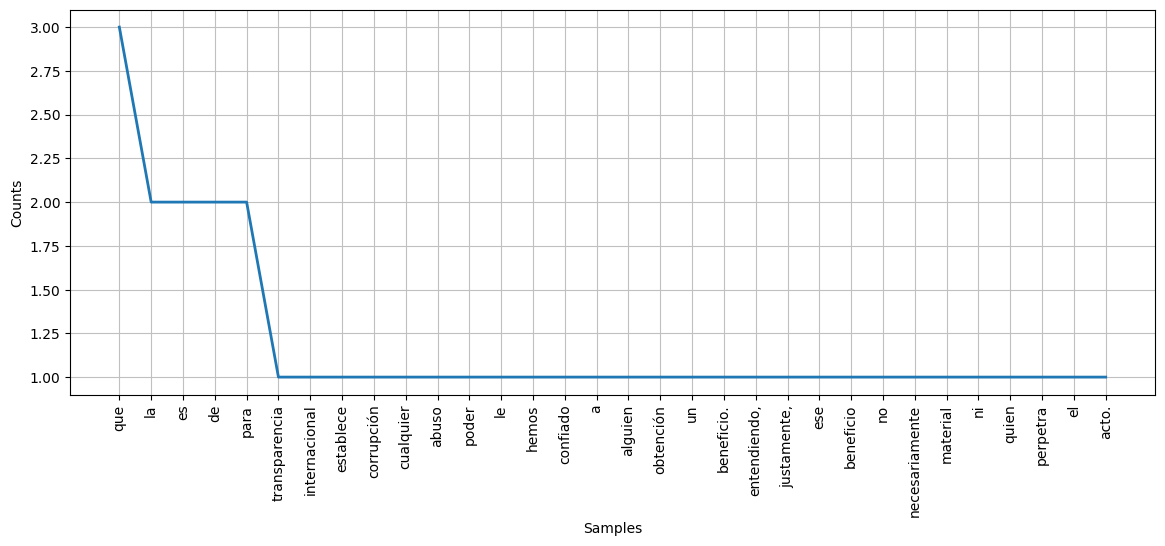

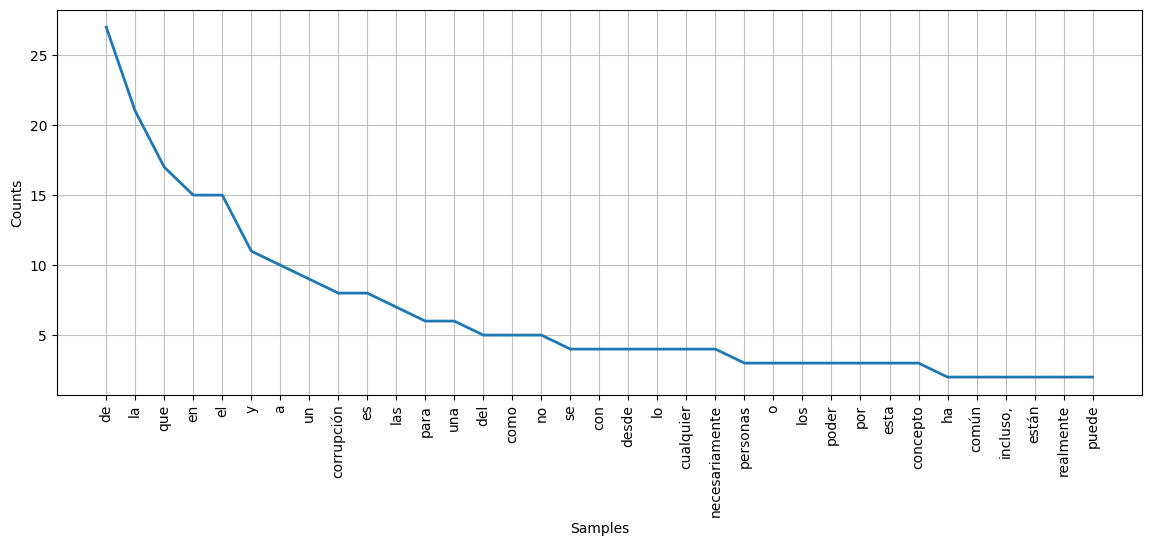

<Axes: xlabel='Samples', ylabel='Counts'>

In [132]:
# Mostramos el grafico

plt.rcParams["figure.figsize"] = (14,5)
art_bajada_tokens_fq.plot(35)
art_contenido_tokens_fq.plot(35)

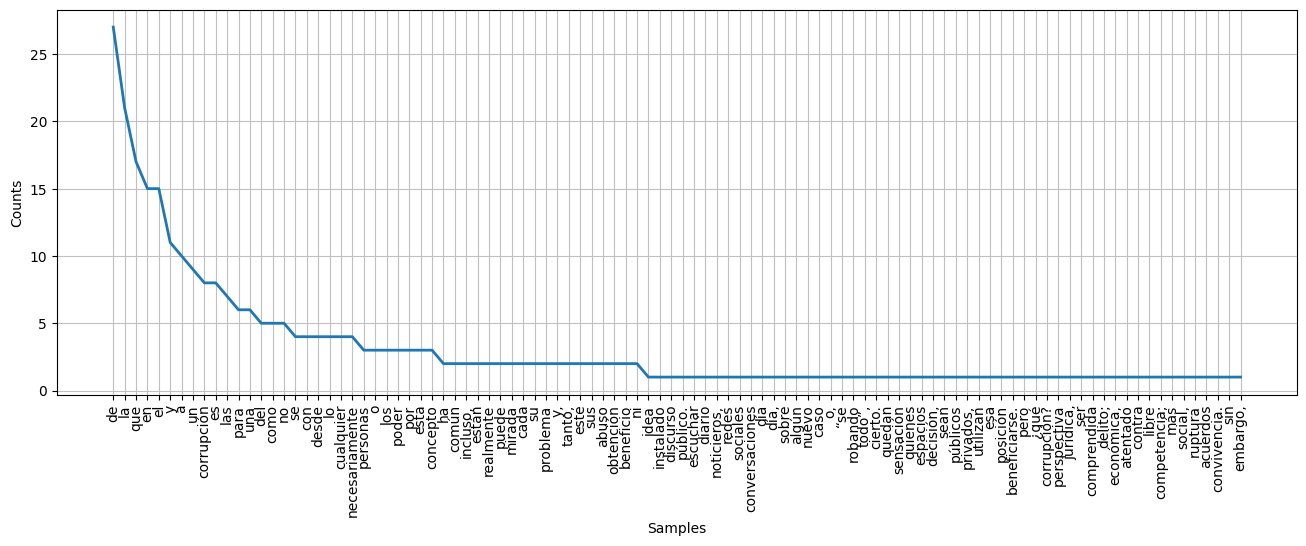

<Axes: xlabel='Samples', ylabel='Counts'>

In [133]:
plt.rcParams["figure.figsize"] = (16,5)
art_contenido_tokens_fq.plot(100)

## **D- REPORTE INFOGRÁFICO:**  
Diseñar un reporte en formato inforgrafia con los resultados, usando los graficos desarrrollados, imágenes y otros recursos. 
Preparar el paterial usnado la simpagenes exportadas y otroa informaicon resultante del proceso. 


## **E-AHORA C WIKIPEDIA**
 

In [137]:
# Imprtar librerias

import pandas as pd # parta trabajar con datios
import matplotlib.pyplot as plt # importar libreria visualizacion.

import wikipediaapi # Para usar articulo de wikipedoa 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # Para generar un WORD CLOUD co textos


In [138]:
# Wikipedia 1 usando la api de WP. NO funciona con Wikimedia. 
laapi = 'https://es.wikipedia.org/w/api.php'


cual_articulo01 = 'La_Araucana'

respuesta = requests.get(
     laapi,
    params={
        'action': 'query',
        'format': 'json',
        'titles': cual_articulo01,
        'prop': 'extracts',
        'exintro': True,
        'explaintext': True,
    }).json()
page = next(iter(respuesta['query']['pages'].values()))
articulo_wiki01 = page['extract'] 

print( articulo_wiki01 )
# print( type(articulo_wiki01) ) # si ven el tipo de dato, es un str


La Araucana (1569, 1578 y 1589) es un poema épico del español Alonso de Ercilla que relata la primera fase de la conquista de Chile, particularmente la Guerra de Arauco entre españoles y araucanos.


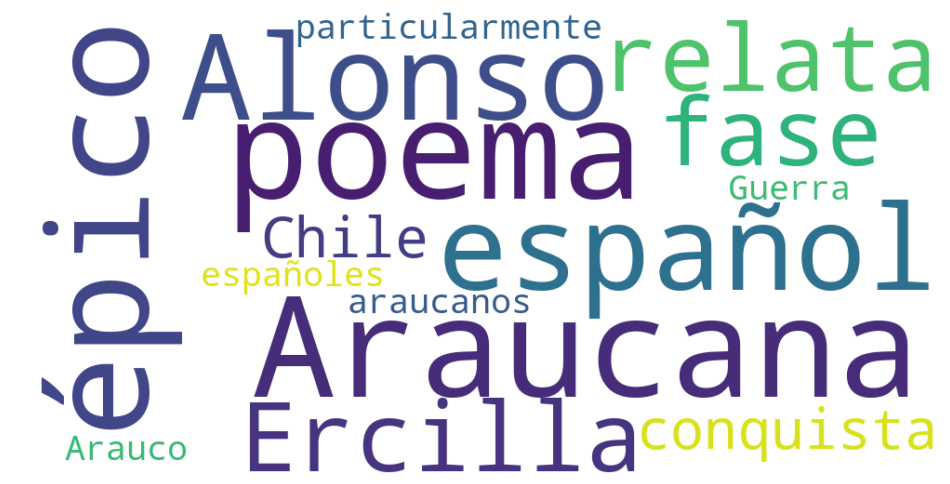

In [139]:
# Nube Palabras Wikipedia 1

# Crear y generar una nube de palabras. 
# https://www.datacamp.com/tutorial/wordcloud-python?utm_source=google&utm_medium=paid_search&utm_campaignid=21057859163&utm_adgroupid=157296744657&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=692112538450&utm_targetid=aud-2274077226600:dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9198028&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-es-lang-en_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-fawnov24&gad_source=1&gclid=Cj0KCQiA0MG5BhD1ARIsAEcZtwS5pg-UuwoLtroXBS3Amgjby3Pz5Qa2Hw7SvBbgZ9jzf-x4j4QMwSAaAuN0EALw_wcB

#mis_stopw = ["de", "del", "es", "entre", "la", "y", "que"]
mis_stopw
wordcloud = WordCloud(width=1000, height=500, min_font_size=10, max_font_size=150, max_words=50, 
                      background_color="white", stopwords = mis_stopw ).generate(articulo_wiki01)
               
# Display imagen:
plt.figure(figsize=(12, 8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Para guardar imagen. 
#wordcloud.to_file("articulo_wiki01.png")
#plt.savefig("abc.png")
#files.download("abc.png")
